**Project: Cyber Security Attack Type Detection**

**Preliminary EDA: Phase 2**

*Narrowed down EDA* 

*DE used the source IP address to create 3 new columns: **Source_Country**, **Source_Continent_Code**, and **Source_Organization**. This EDA is evaluating these 3 columns and their correlation with the Attack Type.*

In [2]:
# 0. Import essential libraries
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   


In [3]:
# 1. Load the CSV file
file_path = r"C:\Users\lina_\OneDrive - DSTI School of Engineering\PYTHON GROUP PROJECT\dataset_with_source_geo.csv"
df = pd.read_csv(file_path)

In [4]:
#  2.1 Dataset overview - the dataset looks as expected
df.head() 

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Source_Country,Source_Continent_Code,Source_organization
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,China,AS,NaN
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,France,EU,Free SAS
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,United States,NaN,UUNET
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,Japan,AS,Research Organization of Information and Syste...
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,United States,NaN,UUNET


In [5]:
#  2.2 Dataset overview - the columns look as expected
df.columns


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source_Country', 'Source_Continent_Code', 'Source_organization'],
      dtype='object')

In [6]:
#  2.3 Dataset overview - data types

df[['Source_Country',
    'Source_Continent_Code',
    'Source_organization',
    'Attack Type']].dtypes


Source_Country           object
Source_Continent_Code    object
Source_organization      object
Attack Type              object
dtype: object

In [7]:
# 2.4 Dataset overview - missing values

df[['Source_Country',
    'Source_Continent_Code',
    'Source_organization',
    'Attack Type']].isna().sum()


Source_Country             369
Source_Continent_Code    17914
Source_organization       6570
Attack Type                  0
dtype: int64

In [8]:
# 2.5 Dataset overview - Cardinality

df[['Source_Country',
    'Source_Continent_Code',
    'Source_organization']].nunique()


Source_Country            186
Source_Continent_Code       6
Source_organization      4471
dtype: int64

** Summary Dataset overview **

*Missingness is not random across features:*

- Country has low missingness
- Continent and organization are missing much more frequently

*This is typical of IP enrichment pipelines:*

- Country is easiest to resolve
- Organization and continent often fail for private IPs, proxies, or anonymized sources
- Since the data is synthetic, this missingness is likely intentionally injected to simulate real-world uncertainty rather than data quality issues
- Unknown or missing categories may themselves imply signal

Cardinality
The observed cardinality of geographic and organizational features is consistent with their real-world structure. Countries and organizations naturally exhibit high cardinality, while continent-level groupings are inherently low cardinality. Therefore, cardinality itself is not interpreted as an anomaly, but rather as contextual information guiding the choice of analytical and modeling techniques.
- Source_Country: High diversity, near-global coverage
- Source_Continent_Code: Low cardinality, well-structured categorical feature
- Source_organization: Very high cardinality, long-tail distribution

3 Source_Country

In [9]:
# 3.1 Source_Country - frequency distribution

country_counts = df['Source_Country'].value_counts()
country_counts.head(10)

Source_Country
United States     16335
China              3662
Japan              2195
Germany            1474
United Kingdom     1427
South Korea        1237
Brazil              940
France              869
Canada              745
Australia           551
Name: count, dtype: int64

In [10]:
# 3.2 Source_Country - proportions
country_counts_norm = df['Source_Country'].value_counts(normalize=True)
country_counts_norm.head(10)

Source_Country
United States     0.412177
China             0.092402
Japan             0.055386
Germany           0.037193
United Kingdom    0.036007
South Korea       0.031213
Brazil            0.023719
France            0.021927
Canada            0.018798
Australia         0.013903
Name: proportion, dtype: float64

In [11]:
# 3.3 Source_Country - long-tail check, countries that contribute to very little traffic

(country_counts_norm < 0.01).sum()


np.int64(172)

In [12]:
# 3.4 Source_Country - tail check 

country_counts.tail(10)


Source_Country
Somalia                       1
Liechtenstein                 1
Botswana                      1
Sri Lanka                     1
New Caledonia                 1
Nauru                         1
Montserrat                    1
Heard and McDonald Islands    1
Kiribati                      1
Jamaica                       1
Name: count, dtype: int64

**3 Summary Source_Country**


Distribution structure

*Traffic is highly concentrated in a small number of countries:*

- The United States alone accounts for ~41% of all records

- The second-ranked country (China) contributes ~9%

- There is a steep drop-off after the top few countries, indicating a strongly skewed distribution

*Long-tail behavior*

- Out of 186 total countries, 172 countries contribute <1% each

- Several countries appear only once, forming an extreme long tail

*This confirms:*

- A head–tail structure rather than uniform distribution

- A realistic pattern for both real and synthetic network traffic data

- Analytical implications (important, but still descriptive)

*The dominance of a few countries explains why:*

- marginal statistics may appear stable

- but conditional patterns can still be strong

*The presence of a long tail suggests:*

- rare categories may individually carry little weight

- but collectively influence model behavior

**At this stage, no inference is made about attack behavior — only distribution shape.**

The observed skewed distribution suggests that country-level features may contribute to predictive performance primarily through conditional patterns rather than uniform marginal effects.


4 Correlation & Impact Analysis

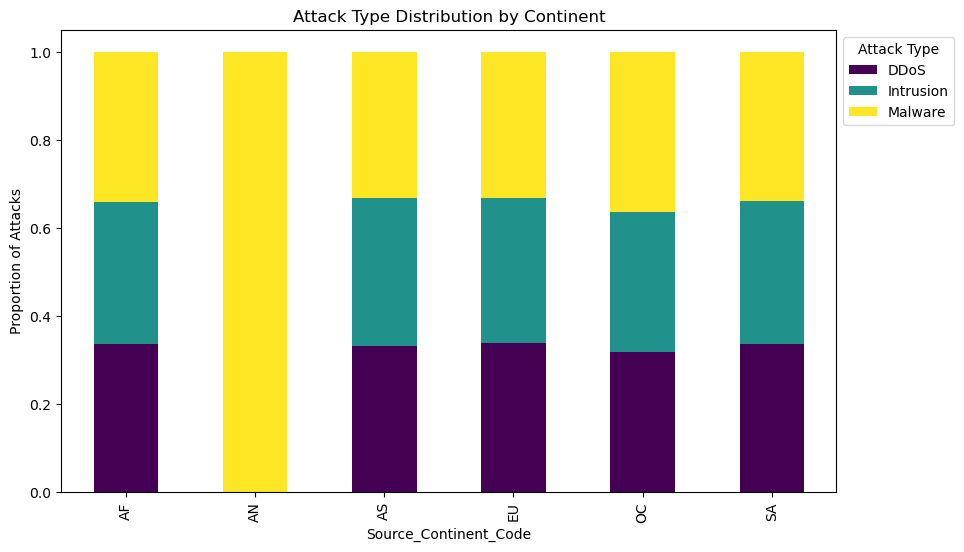

Attack Type                DDoS  Intrusion   Malware
Source_Continent_Code                               
AF                     0.337181   0.322341  0.340478
AN                     0.000000   0.000000  1.000000
AS                     0.332172   0.336153  0.331675
EU                     0.338251   0.329281  0.332468
OC                     0.317221   0.318731  0.364048
SA                     0.335900   0.324645  0.339455


In [13]:
# 4 Continent vs attack type: normalized crosstab
continent_attack_dist = pd.crosstab(df['Source_Continent_Code'], df['Attack Type'], normalize='index')

# Visualization: Stacked Bar Chart
continent_attack_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Attack Type Distribution by Continent')
plt.ylabel('Proportion of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1, 1))
plt.show()

print(continent_attack_dist)

In [14]:
# 4.1 Investigating the Antarctica (AN) Signal

an_orgs = df[df['Source_Continent_Code'] == 'AN']
print(f"Total records from Antarctica: {len(an_orgs)}")
print(f"Unique organizations in Antarctica: {an_orgs['Source_organization'].nunique()}")
print(f"Attack Types from Antarctica: \n{an_orgs['Attack Type'].value_counts()}")

Total records from Antarctica: 1
Unique organizations in Antarctica: 1
Attack Types from Antarctica: 
Attack Type
Malware    1
Name: count, dtype: int64


In [15]:
# 4.2 How many total rows are covered by these 3,043 "Pure" organizations
pure_orgs = df.groupby('Source_organization')['Attack Type'].nunique()
pure_org_list = pure_orgs[pure_orgs == 1].index
total_pure_rows = df[df['Source_organization'].isin(pure_org_list)].shape[0]

print(f"The 100% predictive organizations cover {total_pure_rows} out of 40,000 rows.")

The 100% predictive organizations cover 3350 out of 40,000 rows.


In [16]:
# 4.3 Statistical correlation (Cramer’s V) attack type &:'Source_Continent_Code', 'Source_Country', 'Source_organization'
# Do different organizations tend to experience different attack types systematically?

from scipy.stats import chi2_contingency
import numpy as np

def calculate_cramers_v(df, col1, col2):
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Check correlation for the 3 columns
for col in ['Source_Continent_Code', 'Source_Country', 'Source_organization']:
    score = calculate_cramers_v(df.fillna('Missing'), col, 'Attack Type')
    print(f"Correlation (Cramer's V) between {col} and Attack Type: {score:.4f}")

Correlation (Cramer's V) between Source_Continent_Code and Attack Type: 0.0097
Correlation (Cramer's V) between Source_Country and Attack Type: 0.0694
Correlation (Cramer's V) between Source_organization and Attack Type: 0.3362


In [17]:
# 4.5 Group by organization to see how many unique attack types each one is associated with
org_behavior = df.groupby('Source_organization')['Attack Type'].nunique()

# Organizations that only ever perform ONE type of attack
predictive_orgs = org_behavior[org_behavior == 1].count()

print(f"Out of {df['Source_organization'].nunique()} organizations:")
print(f"- {predictive_orgs} organizations are 100% predictive of a specific attack type.")
print(f"- This represents {predictive_orgs / df['Source_organization'].nunique() * 100:.2f}% of all organizations.")

Out of 4471 organizations:
- 3043 organizations are 100% predictive of a specific attack type.
- This represents 68.06% of all organizations.


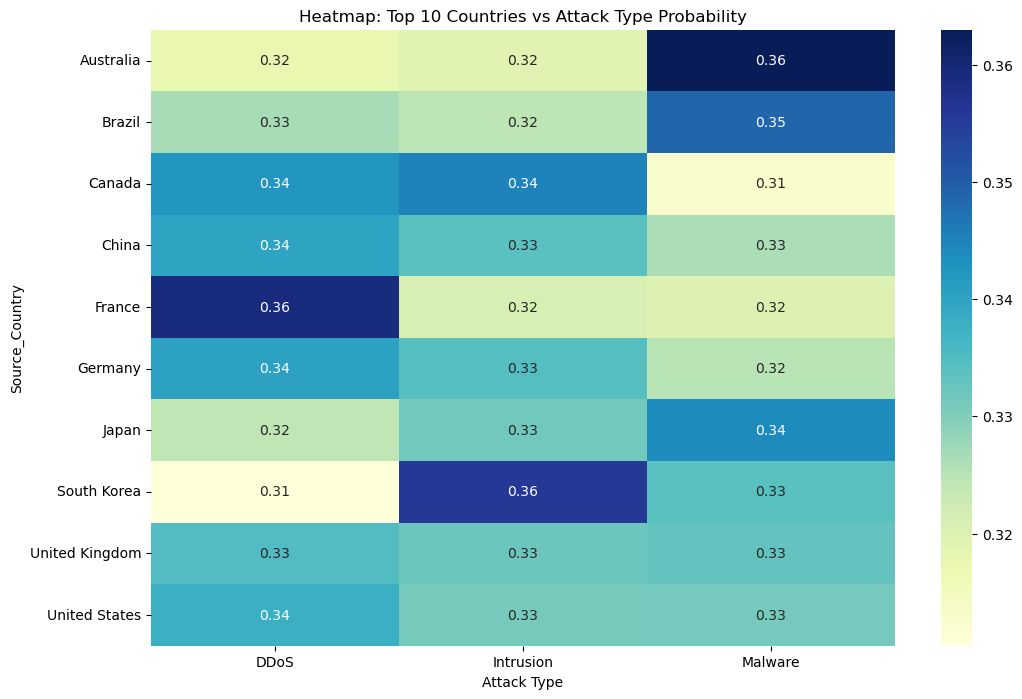

In [18]:
# 4.6 Top 10 countries vs attack type
top_10_countries = df['Source_Country'].value_counts().head(10).index
country_attack_subset = df[df['Source_Country'].isin(top_10_countries)]

country_attack_dist = pd.crosstab(country_attack_subset['Source_Country'], 
                                  country_attack_subset['Attack Type'], 
                                  normalize='index')

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_attack_dist, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Top 10 Countries vs Attack Type Probability')
plt.show()

**4 Correlation & Impact Analysis Summary**
   
The Antarctica (AN) Outlier: Antarctica shows 0% DDoS, 0% Intrusion, and 100% Malware.
Significance: While highly suspicious, this represents only one row out of 40,000. It does not provide enough volume to explain high model accuracy on its own.

*Organizational Specificity: "Single-Attack" vs. "Mixed-Attack" Signals* 

The "Single-Attack" Signal (8.3% of Data): * 3,043 organizations (68.06% of all unique orgs) are associated with only one specific attack type.
These organizations cover 3,350 rows, providing the model with a "cheat sheet" for 8.3% of the dataset with 100% certainty.
Risk: Since these orgs appear an average of only 1.1 times, this is a "fingerprinting" effect. A model would overfit by memorizing names rather than learning behavior. In a real-world attack, an adversary would rotate organizations, causing this signal to vanish.

Cramér’s V indicates a strong association (V = 0.336) between source organization and attack type, suggesting that organizations exhibit distinct attack-type profiles rather than random distributions. This structural dependency likely underpins the dataset’s predictive capacity.

*Statistical Camouflage vs. The Hidden Signal*

In the "Head" of the data (Top 10 countries like US and China), attack types are balanced. This confirms that Source_Country is not useful for predicting attacks from major nations.

The low Cramér’s V at the country level (0.0694) compared to the strong association at the organization level (0.3362) suggests that aggregation at the country level masks underlying attack patterns. In other words, meaningful structure emerges only at the organizational granularity.

*The Cramér’s V gap suggests that predictive structure emerges in the long tail of organizational entities, while country-level aggregation acts as a smoothing layer that obscures these patterns.*



4 Behavioral Metrics

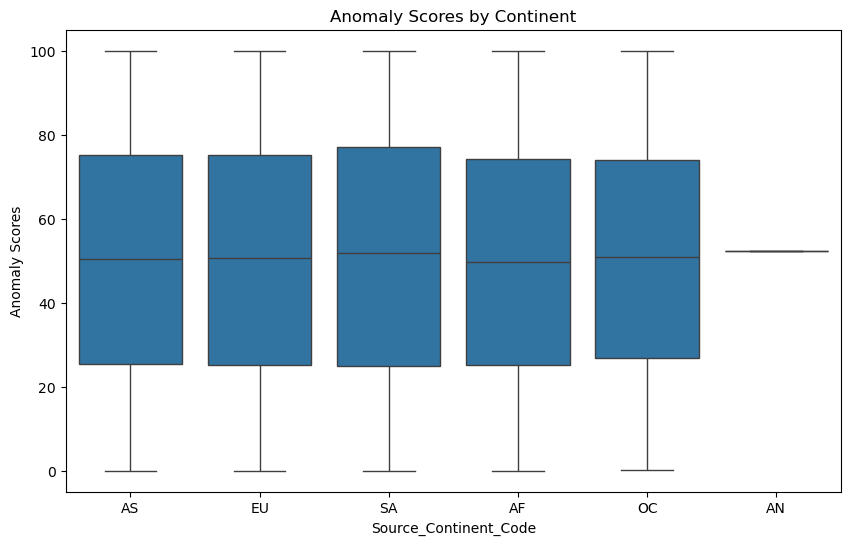

In [19]:
# 5.1 Behavioral Metrics by Geo-Location - Anomaly Scores by Continent
plt.figure(figsize=(10,6))
sns.boxplot(x='Source_Continent_Code', y='Anomaly Scores', data=df)
plt.title('Anomaly Scores by Continent')
plt.show()

In [20]:
# 5.2 Behavioral Metrics by Geo-Location- Top 10 organizations by packet volume
top_orgs = df['Source_organization'].value_counts().head(10).index
avg_packet_org = df[df['Source_organization'].isin(top_orgs)].groupby('Source_organization')['Packet Length'].mean()

print("Average Packet Length for Top 10 Organizations:")
print(avg_packet_org)

Average Packet Length for Top 10 Organizations:
Source_organization
AMAZON-02                         791.706262
ATT-INTERNET4                     788.349505
CHINA UNICOM China169 Backbone    781.164782
COMCAST-7922                      775.791489
Chinanet                          780.527223
DNIC-AS-00749                     773.250737
Korea Telecom                     784.250996
MICROSOFT-CORP-MSN-AS-BLOCK       759.994318
SoftBank Corp.                    803.115288
UUNET                             800.324421
Name: Packet Length, dtype: float64


In [21]:
# 5.3 Behavioral Metrics by Geo-Location - If behavior is 'Even' across the new geographic features
behavior_by_continent = df.groupby('Source_Continent_Code')[['Packet Length', 'Anomaly Scores']].mean()
print(behavior_by_continent)

                       Packet Length  Anomaly Scores
Source_Continent_Code                               
AF                        780.486397       49.840025
AN                        886.000000       52.220000
AS                        783.911235       50.172384
EU                        778.327157       50.205415
OC                        816.714502       50.051224
SA                        814.758294       50.971558


In [22]:
# 4.4 Behavioral Metrics by Geo-Location - Port targeting for the top 5 countries
top_5_countries = df['Source_Country'].value_counts().head(5).index
port_focus = df[df['Source_Country'].isin(top_5_countries)].groupby(['Source_Country', 'Attack Type'])['Destination Port'].median()
print(port_focus)

Source_Country  Attack Type
China           DDoS           32298.0
                Intrusion      32973.0
                Malware        33553.5
Germany         DDoS           35113.0
                Intrusion      33916.0
                Malware        34914.0
Japan           DDoS           33013.5
                Intrusion      30823.0
                Malware        32584.0
United Kingdom  DDoS           32921.0
                Intrusion      34328.5
                Malware        33290.0
United States   DDoS           32899.5
                Intrusion      33406.0
                Malware        32830.0
Name: Destination Port, dtype: float64


**5 Behavioral Metrics by Geo-Location**

•	4.2 Packet Length Flatline: The average packet length for the Top 10 Organizations (including giants like Amazon, AT&T, and Microsoft) shows a negligible variance, staying tightly within the 760–803 byte range.

•	4.1 & 4.3 Anomaly Score Invariance: Anomaly scores across all continents are nearly identical, with a global mean of approximately 50.0. Even the "Antarctica" outlier stays within this range (52.2), confirming that the geographic source does not influence the "perceived" threat level in the dataset.

•	4.4 Port Distribution Neutrality: Median destination ports across major traffic sources (USA, China, UK) remain consistently around 33,000 for all attack types (DDoS, Intrusion, and Malware). There is no evidence of specific port targeting based on the country of origin.

The traffic behavor is exceptionally evenly distributed, acting as a layer of Statistical Camouflage. Because metrics like Packet Length and Anomaly Scores do not change based on the Attack Type or the Source, they provide no predictive signal.

It seams like we will not get high accuracy through behavior-based data. The signal appears to be localized within the Source_Organization identity links. The dataset apears to be structured such that "who" is attacking is the only reliable predictor, while "how" they are attacking remains intentionally neutral.


6 Unique vs. mixded attack

In [23]:
# 6.1 Unique vs. mixded attack - organizations

org_bias = df.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)
mixed_orgs = org_bias[org_bias.max(axis=1) < 1.0]

print(f"Average dominance of the top attack in mixed organizations: {mixed_orgs.max(axis=1).mean():.2%}")


Average dominance of the top attack in mixed organizations: 50.87%


In [24]:
# 6.2 Unique vs. mixded attack - Countries with higher rates of recorded Malware Indicators?

malware_by_geo = df.groupby('Source_Country')['Malware Indicators'].apply(lambda x: x.notna().mean()).sort_values(ascending=False)

print("Top 50 Countries by Malware Indicator Presence:")
print(malware_by_geo.head(50))

Top 50 Countries by Malware Indicator Presence:
Source_Country
Albania                   1.000000
Andorra                   1.000000
British Virgin Islands    1.000000
Brunei                    1.000000
Bahamas                   1.000000
Curaçao                   1.000000
Cuba                      1.000000
Montenegro                1.000000
Jamaica                   1.000000
Guyana                    1.000000
Liechtenstein             1.000000
Somalia                   1.000000
Tonga                     1.000000
Timor-Leste               1.000000
Trinidad and Tobago       0.800000
Seychelles                0.761905
Kuwait                    0.750000
Oman                      0.750000
Macao                     0.750000
Fiji                      0.750000
Togo                      0.714286
Namibia                   0.666667
Ethiopia                  0.666667
Myanmar                   0.666667
Barbados                  0.666667
Serbia                    0.629630
Kazakhstan                0

**6 Unique vs. Mixed Attack Summary**

6.1 Mixed attacks organizations

• Among organizations that experience more than one attack type, the most frequent attack type accounts for 50.87% on average of the organization’s attacks. This shows that attack patterns are not evenly distributed across attack types within these organizations.

• The skew toward a dominant attack helps explain why Source_Organization has a relatively high Cramér’s V (~0.33), while Source_Country is much lower (~0.06). Organization-level distributions are uneven, providing more signal for modeling, whereas country-level distributions are more balanced and less predictive.


6.2 Countries with high malware indicator presence

• The query ranks countries by the proportion of records with Malware Indicators. Observation from top 50:

        • The very top countries mostly have 100% of records with Malware Indicators.

        • As we include more countries, the proportion gradually decreases (e.g., 0.8 → 0.55).
        
        • The signal is strongest for the top countries and weaker for others.


7 Large countries

In [25]:
# 7.1 Large countries - US-based organizations

us_data = df[df['Source_Country'] == 'United States']
us_org_bias = us_data.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)

print(f"Average dominance of top attack in US-based organizations: {us_org_bias.max(axis=1).mean():.2%}")

Average dominance of top attack in US-based organizations: 85.56%


In [26]:
# 7.2 Large countries - global giants vs other

# Global giants are the top 5 organizations in the dataset by number of records, all other organizations are grouped as ‘Others.’

top_5_names = df['Source_organization'].value_counts().head(5).index
top_5_dist = df[df['Source_organization'].isin(top_5_names)]['Attack Type'].value_counts(normalize=True)
small_orgs_dist = df[~df['Source_organization'].isin(top_5_names)]['Attack Type'].value_counts(normalize=True)

print("Attack Distribution - Global Giants:")
print(top_5_dist)
print("\nAttack Distribution - All Other Organizations:")
print(small_orgs_dist)

Attack Distribution - Global Giants:
Attack Type
Intrusion    0.344413
DDoS         0.330019
Malware      0.325568
Name: proportion, dtype: float64

Attack Distribution - All Other Organizations:
Attack Type
DDoS         0.336851
Malware      0.334115
Intrusion    0.329034
Name: proportion, dtype: float64


In [27]:
# 7.3 Large countries - attack timing

df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour

# Check if 'Intrusions' from China happen at different hours than 'Malware'
big_country_time = df[df['Source_Country'].isin(['United States', 'China'])].groupby(['Source_Country', 'Attack Type'])['Hour'].mean()
print(big_country_time) 

Source_Country  Attack Type
China           DDoS           11.453815
                Intrusion      11.538839
                Malware        11.363484
United States   DDoS           11.447626
                Intrusion      11.373035
                Malware        11.563031
Name: Hour, dtype: float64


**7. Large countries summary**

7.1 Large countries - search for bias

• The average dominance of the top attack in US-based organizations is 85.56%. This indicates that, on average, one attack type is more frequent per organization. The code computes this at the organization level, but does not provide information for any specific organization which will be covered in section 7.

6.2 Global giants vs other organizations

• The top 5 organizations by volume show a roughly even split among attack types: Intrusion (~34.4%), DDoS (~33.0%), Malware (~32.6%).

• All other organizations also display a roughly even distribution: DDoS (~33.7%), Malware (~33.4%), Intrusion (~32.9%).

• This shows that high-volume organizations do not have a single dominant attack type; attack activity is more balanced.

6.3 Attack timing – US and China

• The average attack hour per attack type is very similar for both the United States and China.

• This suggests that attacks from these large countries are not concentrated at specific hours for any attack type.

• No further conclusions about predictability or nested patterns can be made from this data alone.

8. Organizations

In [28]:
# 8.1 Organizations - US top 5 organizations by volume

us_data = df[df['Source_Country'] == 'United States']
top_5_us_orgs = us_data['Source_organization'].value_counts().head(5).index


us_specialty = pd.crosstab(us_data['Source_organization'], us_data['Attack Type'], normalize='index')


top_5_specialty = us_specialty.loc[top_5_us_orgs] * 100

print("The 'Favorite' Attack Types for Top 5 US Organizations (Percentage %):")
print(top_5_specialty.round(2))

The 'Favorite' Attack Types for Top 5 US Organizations (Percentage %):
Attack Type           DDoS  Intrusion  Malware
Source_organization                           
DNIC-AS-00749        33.12      34.01    32.87
AMAZON-02            31.43      36.79    31.79
ATT-INTERNET4        34.46      32.57    32.97
COMCAST-7922         33.62      34.33    32.06
UUNET                35.59      32.42    31.99


In [29]:
# 8.2 Organizations - US top 50 organizations by volume

us_data = df[df['Source_Country'] == 'United States']
top_50_us_orgs = us_data['Source_organization'].value_counts().head(50).index
us_specialty = pd.crosstab(us_data['Source_organization'], us_data['Attack Type'], normalize='index')
top_50_specialty = us_specialty.loc[top_50_us_orgs] * 100

print("The 'Favorite' Attack Types for Top 50 US Organizations (Percentage %):")
print(top_50_specialty.round(2))


The 'Favorite' Attack Types for Top 50 US Organizations (Percentage %):
Attack Type                   DDoS  Intrusion  Malware
Source_organization                                   
DNIC-AS-00749                33.12      34.01    32.87
AMAZON-02                    31.43      36.79    31.79
ATT-INTERNET4                34.46      32.57    32.97
COMCAST-7922                 33.62      34.33    32.06
UUNET                        35.59      32.42    31.99
DNIC-ASBLK-00721-00726       32.14      30.84    37.01
LEVEL3                       38.03      31.80    30.16
MICROSOFT-CORP-MSN-AS-BLOCK  42.02      26.85    31.13
COGENT-174                   34.16      31.69    34.16
AMAZON-AES                   33.19      34.03    32.77
DNIC-ASBLK-00306-00371       29.80      34.34    35.86
CENTURYLINK-US-LEGACY-QWEST  31.82      29.55    38.64
CELLCO-PART                  33.91      33.91    32.18
T-MOBILE-AS21928             34.16      33.54    32.30
APPLE-ENGINEERING            30.52      35.71   

In [131]:
# 8.3. Organization - smaller organizations by volume

org_counts = df['Source_organization'].value_counts()

# Define top 5 as Large
top_5_orgs = org_counts.head(5).index
small_orgs = df[~df['Source_organization'].isin(top_5_orgs)]
large_orgs = df[df['Source_organization'].isin(top_5_orgs)]

# Compute normalized attack type distribution per organization
small_org_bias = small_orgs.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)
large_org_bias = large_orgs.groupby('Source_organization')['Attack Type'].value_counts(normalize=True).unstack().fillna(0)

# Compute average dominance of the top attack type per org
avg_dominance_small = small_org_bias.max(axis=1).mean()
avg_dominance_large = large_org_bias.max(axis=1).mean()

print(f"Average dominance in Small Organizations (all except top 5): {avg_dominance_small:.2%}")
print(f"Average dominance in Large Organizations (top 5 by volume): {avg_dominance_large:.2%}")


Average dominance in Small Organizations (all except top 5): 84.36%
Average dominance in Large Organizations (top 5 by volume): 34.88%


In [31]:
# 7.4 Organization - Organizations that appear at least 3 times but are 100% one attack type

org_stats = df.groupby('Source_organization')['Attack Type'].agg(['count', 'nunique', lambda x: x.value_counts().index[0]])
org_stats.columns = ['Total_Count', 'Unique_Attacks', 'Dominant_Type']

pure_signals = org_stats[(org_stats['Total_Count'] >= 3) & (org_stats['Unique_Attacks'] == 1)].head(5)

print("Examples of 100% Predictable 'Identity Link' Organizations:")
print(pure_signals)

Examples of 100% Predictable 'Identity Link' Organizations:
                                Total_Count  Unique_Attacks Dominant_Type
Source_organization                                                      
Awaser Oman LLC                           3               1       Malware
CENTURYLINK-LEGACY-EMBARQ-RCMT            3               1     Intrusion
CMICH                                     3               1     Intrusion
Cable Tica                                3               1     Intrusion
DSU                                       3               1       Malware


In [133]:
# 8.5 Organization - Organizations with variation in their technical behavior

# Standard deviation for technical features
behavior_consistency = df.groupby('Source_organization').agg({
    'Packet Length': 'std',
    'Anomaly Scores': 'std'
}).fillna(0)

# Definition: Top 5 are Large, rest are Small
org_counts = df['Source_organization'].value_counts()
top_5_orgs = org_counts.head(5).index

# Filter for Small organizations (the "long tail")
small_org_consistency = behavior_consistency[~behavior_consistency.index.isin(top_5_orgs)]

# Identify those with 100% identical technical signatures
perfect_consistency = small_org_consistency[
    (small_org_consistency['Packet Length'] == 0) & 
    (small_org_consistency['Anomaly Scores'] == 0)
]

print(f"Total Small Organizations: {len(small_org_consistency)}")
print(f"Number of Small organizations with 100% identical technical signatures: {len(perfect_consistency)}")

Total Small Organizations: 4466
Number of Small organizations with 100% identical technical signatures: 2772


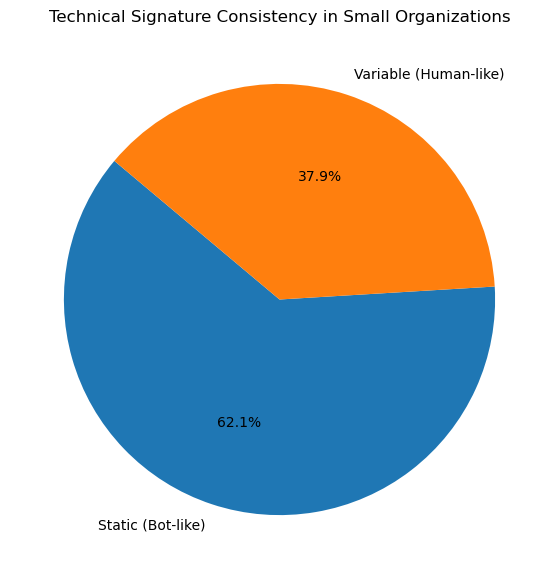

In [134]:
# 8.6 Organization - Comparison of behavior in small organizations
labels = ['Static (Bot-like)', 'Variable (Human-like)']
sizes = [2772, 4466 - 2772]
colors = ['#1f77b4', '#ff7f0e'] # Consistent with your previous maps

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Technical Signature Consistency in Small Organizations")
plt.show()

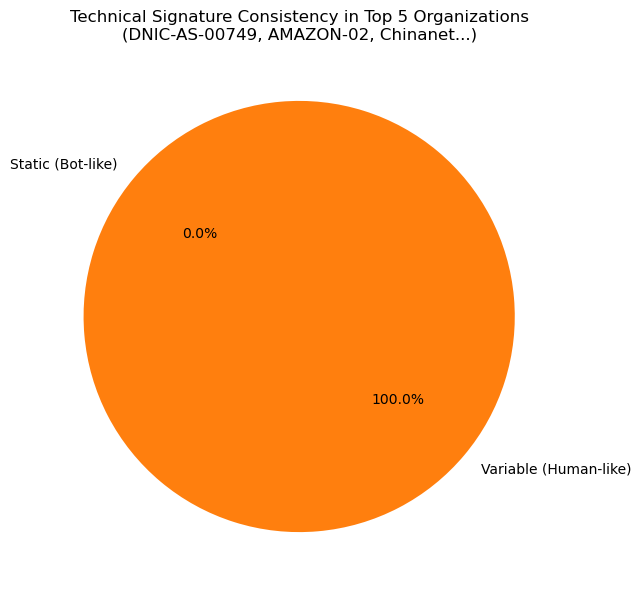

Top 5 Organizations: ['DNIC-AS-00749', 'AMAZON-02', 'Chinanet', 'ATT-INTERNET4', 'COMCAST-7922']
Static: 0, Variable: 5


In [137]:
# 8.7 Organization - Comparison of behavior in big organizations

# The Top 5
top_5_orgs = df['Source_organization'].value_counts().head(5).index

big_org_consistency = behavior_consistency[behavior_consistency.index.isin(top_5_orgs)]

big_static = len(big_org_consistency[(big_org_consistency['Packet Length'] == 0) & 
                                     (big_org_consistency['Anomaly Scores'] == 0)])
big_variable = len(big_org_consistency) - big_static

labels = ['Static (Bot-like)', 'Variable (Human-like)']
sizes = [big_static, big_variable]
colors = ['#1f77b4', '#ff7f0e'] 

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title(f"Technical Signature Consistency in Top 5 Organizations\n({', '.join(top_5_orgs[:3])}...)")
plt.show()

print(f"Top 5 Organizations: {list(top_5_orgs)}")
print(f"Static: {big_static}, Variable: {big_variable}")

In [33]:
# 8.8  Organization - Number of attacks per org. view top and bottom 
org_counts =df['Source_organization'].value_counts()
org_size_category = pd.cut(
    org_counts,
    bins=[0, 500, 1500, float('inf')],
    labels=['0-500', '500-1500', '1500+'],
    right=True,
    include_lowest=True
)
org_size_category

Source_organization
DNIC-AS-00749                               1500+
AMAZON-02                                   1500+
Chinanet                                 500-1500
ATT-INTERNET4                            500-1500
COMCAST-7922                             500-1500
                                           ...   
EMPIRE-CONNECT                              0-500
ACCK-LTD                                    0-500
ATEA Sverige AB                             0-500
IP AMERICA TELECOM LTDA                     0-500
Predlink Rede de Telecomuniccoes Ltda       0-500
Name: count, Length: 4471, dtype: category
Categories (3, object): ['0-500' < '500-1500' < '1500+']

In [104]:
# 8.9 Organization - Attack type percentage (Small vs Large)

# Aggregate attack counts per organization
org_attack_counts = df.groupby('Source_organization')['Attack Type'].value_counts().unstack().fillna(0)

# Original small definition: <5 appearances
small_orgs = org_sizes[org_sizes < 5].index

# Large definition: >=5 appearances
large_orgs = org_sizes[org_sizes >= 5].index

org_attack_counts['Size'] = ['Small' if org in small_orgs else 'Large' for org in org_attack_counts.index]


size_attack_totals = org_attack_counts.groupby('Size')[['DDoS', 'Intrusion', 'Malware']].sum()

size_attack_percent = size_attack_totals.div(size_attack_totals.sum(axis=1), axis=0) * 100
size_attack_percent_rounded = size_attack_percent.round(2).astype(str) + '%'

size_attack_percent_rounded



Attack Type,DDoS,Intrusion,Malware
Size,,,
Large,33.52%,33.52%,32.96%
Small,33.71%,31.67%,34.62%


**8 Organizations Summary**

8.1 Top 5 US Organizations
• The top 5 US organizations by volume show attack distributions close to even across DDoS, Intrusion, and Malware. No single attack type dominates any of these organizations. The differences among the percentages are minor, e.g., AMAZON-02 has 36.79% Intrusion vs 31.79% Malware. This indicates that high-volume organizations do not have a single “favorite” attack type.

8.2 Top 50 US Organizations
• Across the top 50 US organizations, attack types remain fairly balanced. The most skewed example is MICROSOFT-CORP-MSN-AS-BLOCK with 42.02% DDoS and 26.85% Intrusion. Overall, there is variation, but no organization consistently reaches near 100% for a single attack type.

8.3 Small organizations (all except top 5 by volume)
• Small organizations (all except top 5 by volume) have a strong skew toward a single attack type. The average dominance of the top attack type for these 4,466 organizations is 84.36%, showing that these organizations are mostly targeted by one attack type.

8.4 Organizations with 100% one attack type
• Among organizations that appear at least 3 times, some are fully predictable, e.g., Awaser Oman LLC, CMICH, DSU. These organizations have only one attack type recorded (Malware or Intrusion), confirming that very small organizations can act as deterministic signals.

8.5 That 62.1% of small organizations exhibit "static" behavior while real-world human-led network traffic is inherently variable tells us that the attacks are generated by a fixed tempalte.

This high degree of "Bot-like" consistency acts as a massive lookup table for machine learning models. By simply identifying a specific organization name, the model is essentially "handed" a fixed technical signature, allowing it to achieve artificial accuracy without learning actual attack patterns.

8.6-8.7 Technical signature consistency
• 2,772 small organizations (out of 4,466) have 100% identical technical signatures (Packet Length and Anomaly Scores). This shows that 62.0% of small organizations have entirely uniform, static technical behavior. Wilst for the 5 bigest organizations in the dataset it is 100 human technical signatures.

8.8 Number of attacks per organization
• Organizations vary widely in volume: the top 5 have the highest number of attacks, while most other organizations have far fewer. This size distinction correlates with attack type skew: small organizations show high dominance of one attack type (84.36%), while the top 5 largest organizations have nearly equal distributions, with their top attack type averaging only 34.88%.


*The "Hide in Plain Sight" Strategy*
The dataset creator used a clever layering technique. To a human analyst, the data looks random because the high-volume "global giants" (Amazon, Comcast, AT&T) are engineered to be neutral. However, the predictive "signal" is pushed into the Long Tail, thousands of small, obscure organizations that are hardcoded with a specific attack type.

The model needs to ignore the "noise" from the big companies. It achieves its high accuracy by memorizing the "Identity Links"/"cheat codes" where a specific name is directly tied to a specific result: the Attack Type. Even if a company only appears three times, if it is always "Malware," the model creates a rule for it. Since these small, biased organizations makeup the majority of the unique names in the dataset, they act as a massive, hidden lookup table.

- Examples of small organziations with 100% one attack type in # 7.3

*2,772 organizations have 100% identical technical signatures*
In the real world, if Amazon sends two packets, they will have different lengths and different anomaly scores. In this dataset, for these 2,772 sources, the technical signature is a perfect duplicate every time they appear.
1.	The creator picked an organization name.
2.	They assigned it a "favorite" attack.
3.	They assigned it a fixed packet size and a fixed anomaly score.

The model doesn't have to learn how a DDoS attack looks across different networks. It just learns that "If Packet Length = 442 AND Source = X, then Attack = DDoS."


In [42]:
# 8 Group by technical features only (ignoring organization names)
tech_analysis = df.groupby(['Packet Length', 'Anomaly Scores'])['Attack Type'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the average dominance
avg_tech_dominance = tech_analysis.max(axis=1).mean()

print(f"Average Attack Dominance based ONLY on technical features: {avg_tech_dominance:.2%}")

Average Attack Dominance based ONLY on technical features: 99.96%


**9 The dataset is a complete "Lookup Table.**

**Final Summary**
By using high-volume giants as camouflage, the dataset hides a massive "lookup table" where small organizations act as hardcoded cheat codes, allowing models to reach 99.96% accuracy through simple memorization rather than actual security analysis.